# Data Cleaning and Processing

**Installing the required packages**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.__version__

'2.1.2'

## Importing the data

In [21]:
diabetes_df = pd.read_csv('diabetic_data.csv')

In [22]:
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Beginning the data cleansing

Checking how many rows and columns are in the data, the output suggests there are 101,766 rows with 50 columns in the data

In [4]:
diabetes_df.shape

(101766, 50)

In [5]:
diabetes_df.drop(columns=['encounter_id'], inplace=True)

In [6]:
diabetes_df

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [7]:
missing_values_before = diabetes_df.apply(lambda x: (x == '?').sum())

In [8]:
diabetes_curated = diabetes_df.replace('?', np.nan)

In [9]:
missing_values_after = diabetes_curated.isnull().sum()

In [10]:
print("Summary of Missing Values Before and After Replacing '?' with NaN")
print("---------------------------------------------------------------")
print(f"{'Column Name':<30} {'Before':<10} {'After':<10}")
for column in diabetes_df.columns:
    print(f"{column:<30} {missing_values_before[column]:<10} {missing_values_after[column]:<10}")

Summary of Missing Values Before and After Replacing '?' with NaN
---------------------------------------------------------------
Column Name                    Before     After     
patient_nbr                    0          0         
race                           2273       2273      
gender                         0          0         
age                            0          0         
weight                         98569      98569     
admission_type_id              0          0         
discharge_disposition_id       0          0         
admission_source_id            0          0         
time_in_hospital               0          0         
payer_code                     40256      40256     
medical_specialty              49949      49949     
num_lab_procedures             0          0         
num_procedures                 0          0         
num_medications                0          0         
number_outpatient              0          0         
number_emergency      

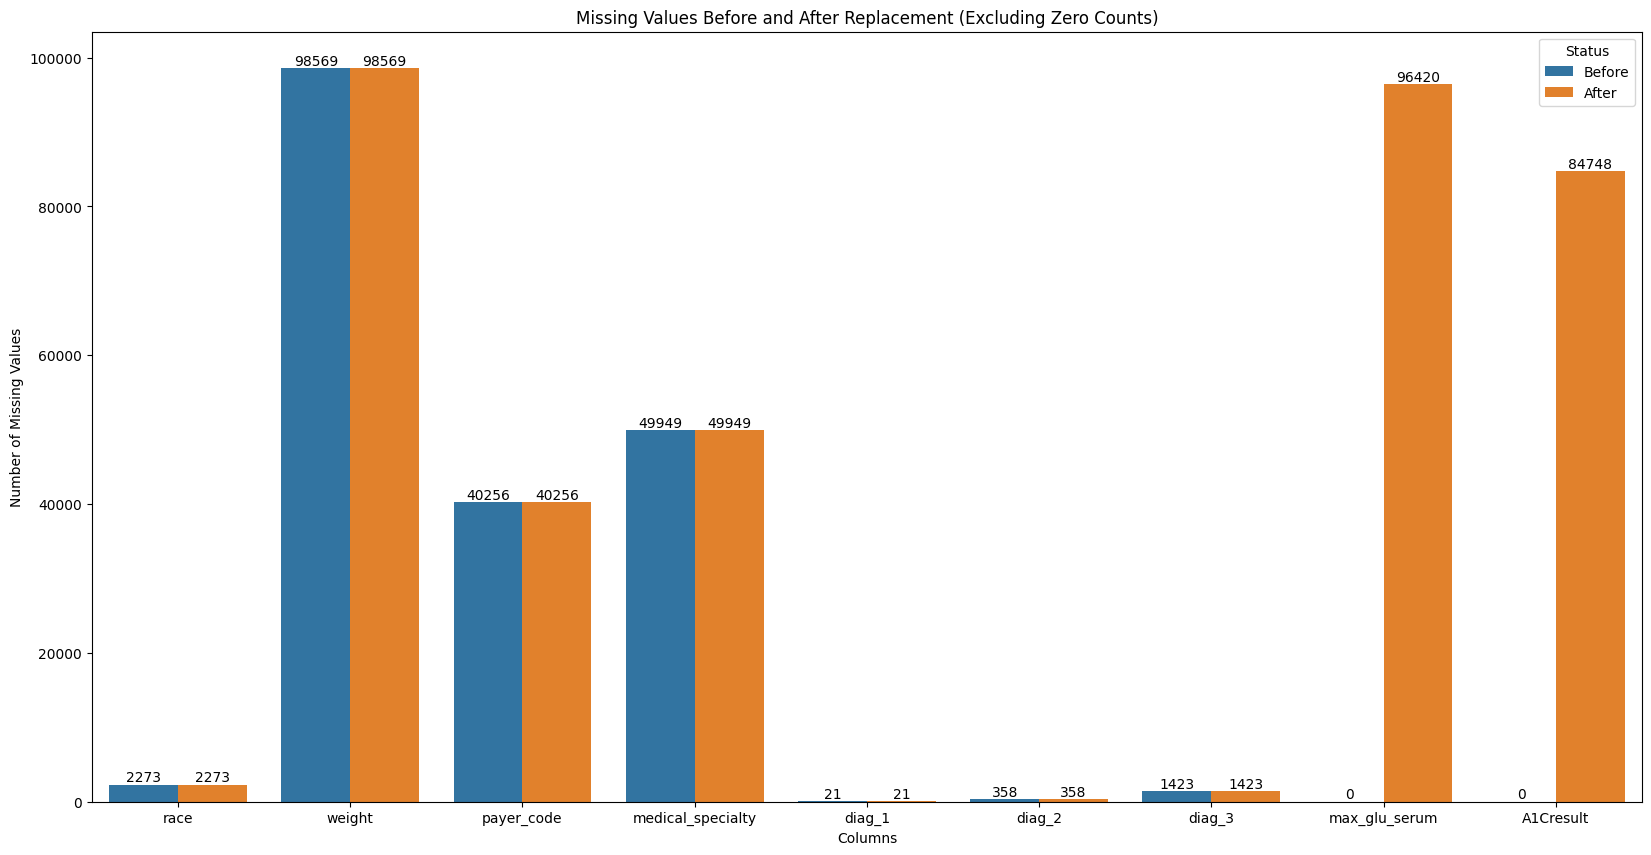

In [11]:
# To Create a DataFrame directly from the counts, filtering non-zero entries
missing_summary = pd.DataFrame({'Before': missing_values_before, 'After': missing_values_after})
missing_summary = missing_summary[(missing_summary['Before'] > 0) | (missing_summary['After'] > 0)].reset_index()

# Plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='index', y='value', hue='variable', data=pd.melt(missing_summary, id_vars='index'))
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Before and After Replacement (Excluding Zero Counts)')
plt.legend(title='Status')

# Label the bars with their respective values
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [12]:
diabetes_curated['readmitted'] = diabetes_curated['readmitted'].replace({'<30': 1, '>30': 0,'NO': 0})

In [13]:
diabetes_curated.head(50)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,0
6,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,0
8,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [14]:
diabetes_curated.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [15]:
for column in diabetes_curated:
  percentage = diabetes_curated[column].isnull().mean() * 100.00
  if percentage > 90.00:
    diabetes_curated.drop(columns=column, inplace = True)

In [16]:
diabetes_curated.isnull().mean() * 100.00

patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride                  0.000000
acetohexamid